Loading checkpoint shards: 100%|██████████████████████████████████████████████████████████| 5/5 [00:06<00:00,  1.26s/it]
Some parameters are on the meta device because they were offloaded to the cpu.


system
You are a helpful assistant.
user

Provide a concise, clear description of the t-shirt suitable for Google search. 
Include details such as color, pattern, text or logo, and style (e.g., crew neck, V-neck, short/long sleeve). 
If the size of the t-shirt is visible, include it; if not, state 'size unknown.' 
Keep the description brief and search-friendly.

assistant
White AC/DC Black Ice T-Shirt | Crew Neck | Short Sleeve | Size Unknown


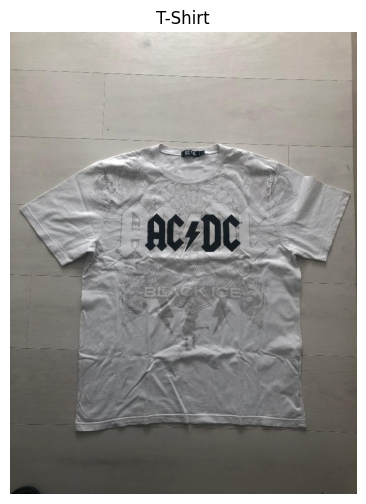

system
You are a helpful assistant.
user

Provide a concise, clear description of the t-shirt suitable for Google search. 
Include details such as color, pattern, text or logo, and style (e.g., crew neck, V-neck, short/long sleeve). 
If the size of the t-shirt is visible, include it; if not, state 'size unknown.' 
Keep the description brief and search-friendly.

assistant
White AC/DC Black Ice T-Shirt | Crew Neck | Short Sleeve | Size Unknown
Computational time is  70.4845519065857


In [2]:
from transformers import AutoProcessor, AutoModelForImageTextToText
from PIL import Image
import torch
import matplotlib.pyplot as plt  # <-- added for plotting
from time import time

start = time()
# Model
model_name = "Qwen/Qwen2.5-VL-7B-Instruct" # "yairpatch/Qwen3-VL-30B-A3B-Instruct-GGUF" 

# Load processor + model
processor = AutoProcessor.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForImageTextToText.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True
)

# Load your image
image = Image.open("white_t_shirt.jpg")

prompt_text = """
Provide a concise, clear description of the t-shirt suitable for Google search. 
Include details such as color, pattern, text or logo, and style (e.g., crew neck, V-neck, short/long sleeve). 
If the size of the t-shirt is visible, include it; if not, state 'size unknown.' 
Keep the description brief and search-friendly.
"""
# Build a proper chat message — note the {"type": "image"} entry
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": prompt_text}
        ]
    }
]

# Apply Qwen's multimodal chat template
prompt = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

# Preprocess (this handles image + text alignment)
inputs = processor(text=prompt, images=[image], return_tensors="pt").to(model.device)

# Generate output
with torch.no_grad():
    output = model.generate(**inputs, max_new_tokens=256)

# Decode response
response = processor.decode(output[0], skip_special_tokens=True)
print(response)

# --- Plot the image with the description ---
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')
plt.title("T-Shirt", fontsize=12)
plt.show()
print(response)

end = time()
print("Computational time is ", end - start)

In [5]:
# https://www.confident-ai.com/blog/llm-evaluation-metrics-everything-you-need-for-llm-evaluation
!pip install deepeval

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 kB 2.8 MB/s  0:00:0036m-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 3.8 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.9 MB/s  0:00:00 eta 0:00:01
  Attempting uninstall: clickm━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  7/33 [googleapis-common-protos]
    Found existing installation: click 8.3.0━━━━━━━━━━━━━━━━━━  7/33 [googleapis-common-protos]
    Uninstalling click-8.3.0:0m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  7/33 [googleapis-common-protos]
      Successfully uninstalled click-8.3.0━━━━━━━━━━━━━━━━━━━━  7/33 [googleapis-common-protos]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33/33 [deepeval]/33 [deepeval]nai]ings]oto-common]


In [ ]:
from deepeval.metrics import HallucinationMetric
from deepeval.test_case import LLMTestCase

test_case=LLMTestCase(
  input="...", 
  actual_output="...",
  # Note that 'context' is not the same as 'retrieval_context'.
  # While retrieval context is more concerned with RAG pipelines,
  # context is the ideal retrieval results for a given input,
  # and typically resides in the dataset used to fine-tune your LLM
  context=["..."],
)
metric = HallucinationMetric(threshold=0.5)

metric.measure(test_case)
print(metric.score)
print(metric.is_successful())

In [ ]:
examples = {
  "non_spam": {
    "description": "White AC/DC Black Ice T-Shirt. Crew neck, short sleeve. Classic band tee, clean condition, minimal wear. Suitable for casual wear or collectors.",
    "label": 0
  },
  "spam": {
    "description": "🔥RARE White AC/DC Black Ice T-Shirt🔥 Crew neck & short sleeve! Size unknown, perfect for Y2K, vintage, concert merch, festival, retro, streetwear collection! DM for more pics 💥 #ACDC #Rock #Vintage #BandMerch #Y2K #Streetwear #RareFinds #LimitedEdition #DepopFamous #90s #2000s #ConcertTee #FestivalStyle #CollectorsItem",
    "label": 1
  }
}

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: bea2b4da-55e2-4bb2-be85-893a6d584bed)')' thrown while requesting HEAD https://huggingface.co/Qwen/Qwen2.5-VL-7B-Instruct/resolve/main/processor_config.json
Retrying in 1s [Retry 1/5].
Loading checkpoint shards: 100%|██████████████████████████████████████████████████████████| 5/5 [00:34<00:00,  6.86s/it]


system
You are a helpful assistant.
user
Provide a brief description of image
assistant
The image shows a white T-shirt laid flat on a wooden surface. The T-shirt features a graphic design with the band name "AC/DC" prominently displayed in bold, black letters across the chest. Below the band name, there is an illustration that appears to be a stylized depiction of a horse or similar creature, surrounded by intricate patterns and designs. The text "BLACK ICE" is also visible on the shirt, likely referring to an album title or tour name associated with AC/DC. The overall design has a metallic, reflective quality, giving it a distinctive look.


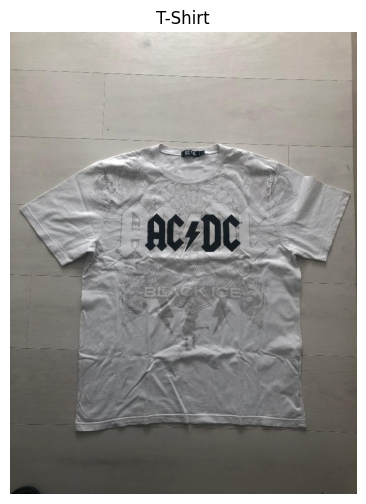

system
You are a helpful assistant.
user
Provide a brief description of image
assistant
The image shows a white T-shirt laid flat on a wooden surface. The T-shirt features a graphic design with the band name "AC/DC" prominently displayed in bold, black letters across the chest. Below the band name, there is an illustration that appears to be a stylized depiction of a horse or similar creature, surrounded by intricate patterns and designs. The text "BLACK ICE" is also visible on the shirt, likely referring to an album title or tour name associated with AC/DC. The overall design has a metallic, reflective quality, giving it a distinctive look.
Computational time is  57.32690215110779


In [4]:
from transformers import AutoProcessor, AutoModelForImageTextToText
from PIL import Image
import torch
import matplotlib.pyplot as plt  # <-- added for plotting
from time import time

start = time()
# Model
model_name = "Qwen/Qwen2.5-VL-7B-Instruct" # "yairpatch/Qwen3-VL-30B-A3B-Instruct-GGUF" 

# Load processor + model
processor = AutoProcessor.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForImageTextToText.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True
)

# Load your image
image = Image.open("white_t_shirt.jpg")

prompt_text = "Provide a brief description of image"
# Build a proper chat message — note the {"type": "image"} entry
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": prompt_text}
        ]
    }
]

# Apply Qwen's multimodal chat template
prompt = processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

# Preprocess (this handles image + text alignment)
inputs = processor(text=prompt, images=[image], return_tensors="pt").to(model.device)

# Generate output
with torch.no_grad():
    output = model.generate(**inputs, max_new_tokens=256)

# Decode response
response = processor.decode(output[0], skip_special_tokens=True)
print(response)

# --- Plot the image with the description ---
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')
plt.title("T-Shirt", fontsize=12)
plt.show()
print(response)

end = time()
print("Computational time is ", end - start)